# 绘图和可视化

绘图是数据分析工作中最重要的任务之一，是探索过程的一部分，例如，帮助我们找出异常值、必要的数据转换、得出有关模型的idea等，此外，还可以利用诸如d3.js( http://d3js.org/ )之类的工具为Web应用构建交互式图像；

In [136]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import pandas as pd
from pandas import Series
from pandas import DataFrame

## matplotlib api入门

### plot

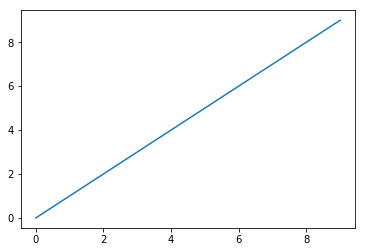

In [16]:
plt.plot(np.arange(10))

### Figure/Subplot

#### 示例

matlib的图像都存在于Figure中，可以直接创建：

In [23]:
fig = plt.figure()

不能通过空figure绘图，必须添加subplot

In [24]:
ax1 = fig.add_subplot(2,2,1) # 表示添加一个subplot，位于2*2的格子中的第1个
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

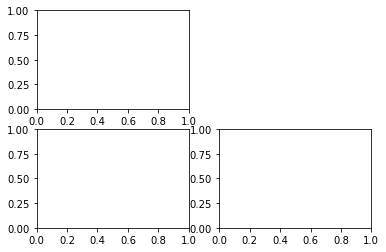

In [25]:
fig # add了subplot后的figure

如果这时发出一条绘图命令(如plt.plot([1.5,3.5,-2,1.6]))，matplotlib就会在最后一个用过的subplot(如果没有则创建一个)上进行绘制；

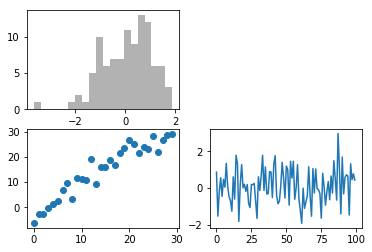

In [26]:
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax3.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
ax4.plot(np.random.randn(100))
fig

#### pyplot.subplots的参数选项

* nrows：subplot的行数；
* ncols：subplot的列数；
* sharex：所有subplot使用相同的X轴刻度（改变xlim会影响所有的subplot）；
* sharey：所有subplot使用相同的Y轴刻度（改变ylim会影响所有的subplot）；
* subplot_kw：用于创建各subplot的关键字字典；
* \*\*fig_kw：创建figure时的其他关键字，如plt.subplots(2,2,figsize=(8,6))

### 调整subplot周围的间距 -- subplots_adjust

默认情况下，matplotlib会在subplot外围留下一定的边距，并在subplot之间留下一定的间距，间距跟图像的高度和宽度有关，因此，如果你调整了图像大小(不管是编程还是手工)，间距也会自动调整，利用Figure的subplots_adjust方法可以轻而易举地修改间距，此外，它也是个顶级函数；

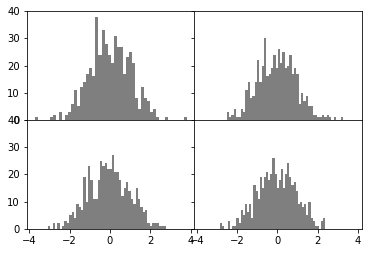

In [29]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0) # wspace宽度，hspace高度百分比，可以看到间距为0之后各个subplot紧挨在一起

### 颜色、标记和线性

#### 参数使用示例

matplotlib的plot函数接受一组X和Y坐标，还可以接受一个表示颜色和线型的字符串缩写，例如，要根据x和y绘制绿色虚线,你可以执行如下代码；

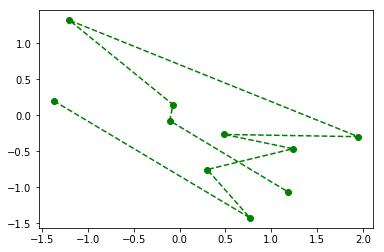

In [34]:
# 下述'g--'等价于linestyle='--', color='g', marker='o'
plt.plot(np.random.randn(10), np.random.randn(10), 'go--') # g--描述的是颜色和线性，g：绿色，o：标记类型圆，--：折线

#### 插值方式

在线型图中,非实际数据点默认是按线性方式插值的。可以通过drawstyle选项修改：

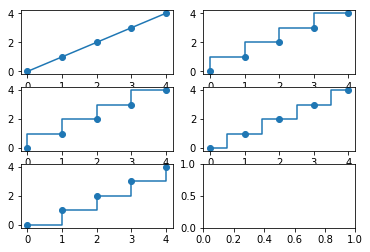

In [48]:
fig,axes = plt.subplots(3,2)
axes[0,0].plot(np.arange(5), marker='o')
axes[0,1].plot(np.arange(5), drawstyle='steps', marker='o')
axes[1,0].plot(np.arange(5), drawstyle='steps-pre', marker='o')
axes[1,1].plot(np.arange(5), drawstyle='steps-mid', marker='o')
axes[2,0].plot(np.arange(5), drawstyle='steps-post', marker='o')

根据上述图示看出：
* default：默认是线性插值；
* steps：x轴递增的同时，y轴取后一个数据点的y值；
* steps-pre：x轴递增的同时，y轴取后一个数据点的y值；
* steps-mid：x轴递增的同时，前半段y轴取前一个数据点的y值，后半段y轴取后一个数据点的y值；
* steps-post：x轴递增的同时，y轴取前一个数据点的y值；

### 刻度、标签和图例

对于大多数的图表装饰项，其主要实现方式有二：使用**过程型的pyplot接口**(MATLAB用户非常熟悉)以及更为**面向对象的原生matplotlib API**；

pyplot接口的设计目的就是交互式使用,含有诸如xlim、xticks和xticklabels之类的方法，它们分别控制图表的范围、刻度位置、刻度标签等，其使用方式有以下两种：
* 调用时不带参数，则返回当前的参数值，例如,plt.xlim()返回当前的X轴绘图范围；
* 调用时带参数，则设置参数值，因此,plt.xlim([0,10])会将X轴的范围设置为0到10；

### 设置标题、轴标签、刻度以及刻度标签

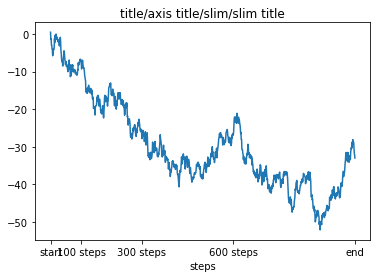

In [61]:
_,aex = plt.subplots(1,1)
aex.set_title('title/axis title/slim/slim title') # 设置标题
aex.set_xlabel('steps') # 设置x轴标签
aex.set_xticks([0,100,300,600,1000]) # 设置x轴刻度
aex.set_xticklabels(['start','100 steps','300 steps','600 steps','end']) # 设置x轴刻度标签
aex.plot(np.random.randn(1000).cumsum())

### 添加图例 -- 底图上的线段指示

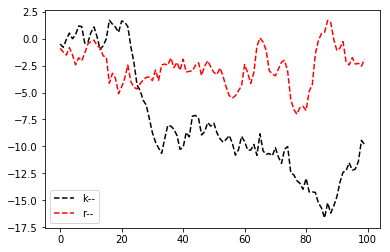

In [69]:
fig = plt.figure(); 
axe = fig.add_subplot(1, 1, 1)
axe.plot(np.random.randn(100).cumsum(), 'k--', label='k--') # 此处的label属性会显示在图示上
axe.plot(np.random.randn(100).cumsum(), 'r--', label='r--')
axe.legend(loc='best') # 指定图示位置，一般使用best即可，会放置在最不碍事的地方

### 注解以及在Subplot上绘图

#### 增加注解 -- text/arrow/annotate

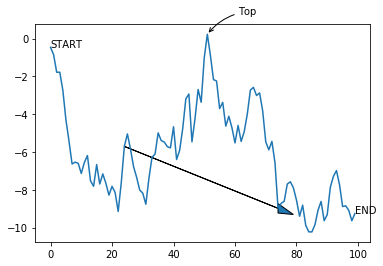

In [117]:
fig = plt.figure(); axe = fig.add_subplot(1, 1, 1)
data = np.random.randn(100).cumsum()
axe.plot(data)
axe.text(x=0,y=data[0],s='START',fontsize=10)
axe.text(x=99,y=data[99],s='END',fontsize=10)
axe.arrow(x=24,y=data[24],
          dx=74-24,dy=data[74]-data[24],
          head_width=0.5, head_length=5) # dx,dy是偏移量
axe.annotate(s='Top',
             xy=(data.argmax(),data.max()),
             xytext=(data.argmax()+10,data.max()+(data.max()-data.min())/10.), # xytext是注解所在位置
             arrowprops=dict(arrowstyle='->', connectionstyle="arc3,rad=.2"))

#### 图形绘制

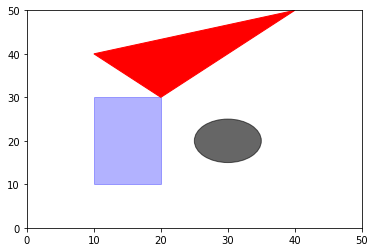

In [134]:
fig = plt.figure(); axe = fig.add_subplot(1, 1, 1)
axe.set_xticks([0,10,20,30,40,50])
axe.set_yticks([0,10,20,30,40,50])
rectangle = plt.Rectangle(angle=0,xy=(10,10),width=10,height=20,color='b',alpha=0.3) # angle旋转角度（逆时针）
circle = plt.Circle(radius=5,xy=(30,20),color='k',alpha=0.6) # 由于横纵坐标系比例不一致，导致看起来是椭圆
polygon = plt.Polygon(xy=[(10,40),(20,30),(40,50)],closed=True,color='r')
axe.add_patch(rectangle)
axe.add_patch(circle)
axe.add_patch(polygon)

### 将图表保存到文件 -- plt.savefig

* fname：含有文件路径字符串或者python文件型对象，输出文件类型由后缀名推断，例如.pdf推断为PDF，.png推断为PNG；
* dpi：图像分辨率（每英寸点数），默认100；
* facecolor、edgecolor：图像背景色，默认为白色（w）；
* format：显示设置文件格式（“pdf”，“png”，“svg”，“ps”，“eps”）；
* bbox_inches：图表需要保存的部分，如果设置为“tight”，则会裁剪掉周围空白的部分；

### matplotlib配置

matplotlib自带一些配色方案,以及为生成出版质量的图片而设定的默认配置信息。幸运的是,几乎所有默认行为都能通过一组全局参数进行自定义,它们可以管理图像大小、subplot边距、配色方案、字体大小、网格类型等。操作matplotlib配置系统的方式主要有两种。第一种是Python编程方式,即利用rc方法。比如说,要将全局的图像默认大小设置为10×10,你可以执行:

    plt.rc('figure', figsize=(10, 10))
rc的第一个参数是希望自定义的对象,如'figure'、'axes'、'xtick'、'ytick'、'grid'、'legend'等。其后可以跟上一系列的关键字参数。最简单的办法是将这些选项写成一个字典:

    font_options = {'family' : 'monospace',
                    'weight' : 'bold',
                    'size' : 'small'}
    plt.rc('font', **font_options)

## pandas中的绘图函数

不难看出,matplotlib实际上是一种比较**低级**的工具。要组装一张图表,你得用它的各种基础组件才行:**数据展示**(即图表类型:线型图、柱状图、盒形图、散布图、等值线图等)、**图例**、**标题**、**刻度标签**以及其他**注解型信息**。这是因为要根据数据制作一张完整图表通常都需要用到多个对象。在pandas中,我们有行标签、列标签以及分组信息(可能有)。这也就是说,要制作一张完整的图表,原本需要一大堆的matplotlib代码,现在只需一两条简洁的语句就可以了。pandas有许多能够利用**DataFrame对象数据**组织特点来创建标准图表的高级绘图方法(这些函数的数量还在不断增加)。

### 线形图

#### 示例

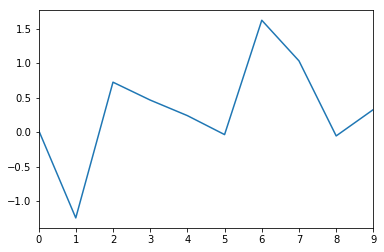

In [137]:
se = Series(np.random.randn(10))
se.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f51780774d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f517935da90>], dtype=object)

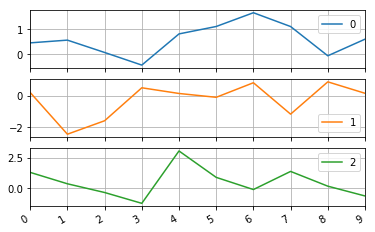

In [143]:
df = DataFrame(np.random.randn(10,3))
df.plot(grid=True,subplots=True) # DataFrame会自动将列名作为图例添加进去

#### 内置plot参数

Series/DataFrame共有参数：
* label：图例标签；
* ax：要在其上回追的matplotlib subplot对象，没有设置使用默认的；
* style：风格字符串，例如'ko--'，颜色为灰色，marker为圆点，线性为 --；
* alpha：透明度；
* kind：图形类型，默认是折线型，可选line，bar，barh，kde；
* logy：在y轴上使用对数标尺；
* use_index：将对象的索引用作刻度标签；
* rot：旋转刻度标签（标签太长互相覆盖时使用）；
* xticks：用作x轴刻度的值；
* yticks：用作y轴刻度的值；
* xlim：x轴界限（例如[0,10]）；
* ylim：y轴界限；
* grid：是否绘制网格；

DataFrame专用参数：
* subplots：将各个DataFrame列绘制到单独的Subplot中；
* sharex：各个Subplot共享x轴；
* sharey：各个Subplot共享y轴；
* figsize：图像大小的元组；
* title：图像标题；
* legend：添加图例，默认是True；
* sort_columns：以字母表顺序绘制列，默认是按照当前列顺序绘制；

### 柱状图

在生成线型图的代码中加上**kind='bar'(垂直柱状图)或kind='barh'(水平柱状图)**即可生成柱状图。这时,Series和DataFrame的**索引**将会被用作**X(bar)**或**Y(barh)**刻度。

#### bar

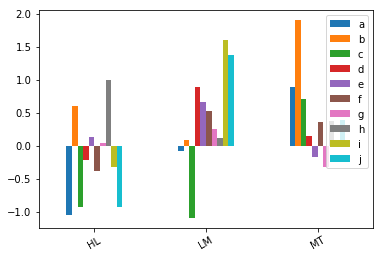

In [150]:
df = DataFrame(np.random.randn(3,10), columns=list('abcdefghij'), index=['HL','LM','MT'])
df.plot(kind='bar',rot=30)

#### barh

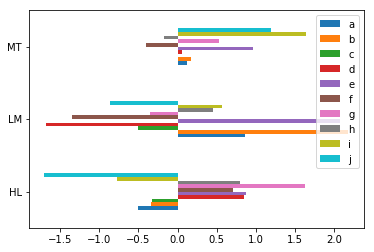

In [149]:
df = DataFrame(np.random.randn(3,10), columns=list('abcdefghij'), index=['HL','LM','MT'])
df.plot(kind='barh')

### 直方图/密度图 -- hist

直方图(histogram)是一种可以对**值频率**进行**离散化显示**的柱状图。数据点被**拆分**到**离散**的、**间隔均匀**的**面元**中,绘制的是各面元中数据点的**数量**。

### 散点图 -- scatter

散点图(scatter plot)是观察两个一维数据序列之间的关系的有效手段。matplotlib的scatter方法是绘制散布图的主要方法。

## 绘制地图：图形化显示海底地震危机数据

Ushahidi是一家非营利软件公司,人们可以通过短信向其提供有关自然灾害和地缘政治事件的信息。这些数据集会被发布在他们的网站( http://community.ushahidi.com/research/datasets/ )上以供分析和图形化。

## python图形化工具生态系统

本书主要涉及的是matplotlib,因为它是Python领域中使用最广泛的绘图工具。虽然matplotlib是Python科学计算生态系统的重要组成部分,但它在统计图表的创建和展示方面仍然有许多缺点。MATLAB用户可能会对matplotlib感到熟悉,而R用户(尤其是使用ggplot2和trellis的那些)可能就会比较郁闷了(至少目前是)。虽然matplotlib可以为Web应用创建漂亮的图表,但这通常需要耗费大量的精力,因为它原本是为印刷而设计的。先不管美不美观,至少它足以应付大部分需求。在pandas中,我跟其他开发人员一直都在寻求使数据分析中的大部分绘图工作变得更简单的办法。

### Chaco

Chaco( http://code.enthought.com/chaco/ )是由Enthought开发的一
个绘图工具包,它既可以绘制静态图又可以生成交互式图形,如图8-
26所示。它非常适合用复杂的图形化方式表达数据的内部关系。跟
matplotlib相比,Chaco对交互的支持要好得多,而且渲染速度很快。如
果要创建交互式的GUI应用程序,它确实是个不错的选择。

### mayavi

mayavi项目(由Prabhu Ramachandran、Gal Varoquaux等人开发)
是一个基于开源C++图形库VTK的3D图形工具包。跟matplotlib一样,
mayavi也能集成到IPython以实现交互式使用。通过鼠标和键盘操作,
图形可以被平移、旋转、缩放。在第12章中,我用mayavi制作了一张有
关广播的插图。我没有给出任何调用mayavi的代码,但你可以在网上
找到很多文档和示例。我相信它能成为WebGL(以及相关产品)的替代
品,虽然其生成的图形很难以交互的形式共享。

### 其他

当然,Python领域中还有许多其他的图形化库和应用程序:
PyQwt、Veusz、gnuplot-py、biggles等。我就曾经见过PyQwt被用在基于
Qt框架(PyQt)的GUI应用程序中。许多库都还在不断地发展(有些已经
被用在大型应用程序当中了)。近几年来,我发现了一个总体趋势:大
部分库都在向基于Web的技术发展,并逐渐远离桌面图形技术。下面
我要就这个问题多说几句。

### 图形化工具的未来

基于Web技术(比如JavaScript)的图形化是必然的发展趋势。毫无疑问,许多基于Flash或JavaScript的静态或交互式图形化工具已经出现了很多年。而且类似的新工具包(如d3.js及其分支项目)一直都在不断涌现。相比之下,非Web式的图形化开发工作在近几年中减慢了许多。Python以及其他数据分析和统计计算环境(如R)都是如此。

于是,开发方向就变成了实现数据分析和准备工具(如pandas)与Web浏览器之间更为紧密的集成。我希望这个思路今后能成为Python以及非Python用户之间富有成效的协作手段。